In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics

In [31]:
PERP_df = pd.read_csv('/ETHPERP_1min.csv')
PERP_df.set_index('time', inplace=True)

Spot_df = pd.read_csv('/ETHUSD_1min.csv')
Spot_df.set_index('time', inplace=True)

In [32]:
main_df = pd.DataFrame()

main_df['PERP_open'] = PERP_df['open']
main_df['Spot_open'] = Spot_df['open']

main_df['PERP_close'] = PERP_df['close']
main_df['Spot_close'] = Spot_df['close']

Spot_open = main_df['Spot_open']
PERP_open = main_df['PERP_open']

main_df.dropna(inplace=True)
main_df

PERP_open  Spot_open  PERP_close  Spot_close
time                                                      
1.609452e+12     738.97     738.79      739.14      738.96
1.609452e+12     739.14     738.96      739.11      738.87
1.609452e+12     739.11     738.87      738.92      738.69
1.609452e+12     738.92     738.69      738.41      738.39
1.609452e+12     738.41     738.39      736.94      736.78
...                 ...        ...         ...         ...
1.653912e+12    1900.10    1899.70     1900.10     1899.90
1.653912e+12    1900.10    1899.90     1899.30     1898.90
1.653912e+12    1899.30    1898.90     1899.80     1899.30
1.653912e+12    1899.80    1899.30     1898.80     1898.40
1.653912e+12    1898.80    1898.40     1901.70     1901.40

[740883 rows x 4 columns]

In [33]:
main_df['spread'] = main_df['PERP_open'].sub(main_df['Spot_open'], axis=0)
main_df['close_spread'] = main_df['PERP_close'].sub(main_df['Spot_close'], axis=0)

spread = main_df['spread']
close_spread = main_df['close_spread']

main_df

PERP_open  Spot_open  PERP_close  Spot_close  spread  \
time                                                                 
1.609452e+12     738.97     738.79      739.14      738.96    0.18   
1.609452e+12     739.14     738.96      739.11      738.87    0.18   
1.609452e+12     739.11     738.87      738.92      738.69    0.24   
1.609452e+12     738.92     738.69      738.41      738.39    0.23   
1.609452e+12     738.41     738.39      736.94      736.78    0.02   
...                 ...        ...         ...         ...     ...   
1.653912e+12    1900.10    1899.70     1900.10     1899.90    0.40   
1.653912e+12    1900.10    1899.90     1899.30     1898.90    0.20   
1.653912e+12    1899.30    1898.90     1899.80     1899.30    0.40   
1.653912e+12    1899.80    1899.30     1898.80     1898.40    0.50   
1.653912e+12    1898.80    1898.40     1901.70     1901.40    0.40   

              close_spread  
time                        
1.609452e+12          0.18  
1.609452e+12          0.24  
1.609452e+12          0.23  
1.609452e+12          0.02  
1.609452e+12          0.16  
...                    ...  
1.653912e+12          0.20  
1.653912e+12          0.40  
1.653912e+12          0.50  
1.653912e+12          0.40  
1.653912e+12          0.30  

[740883 rows x 6 columns]

### Data exploration

Spreads are calculated as the difference between perpetual futures open prices and spot open prices.

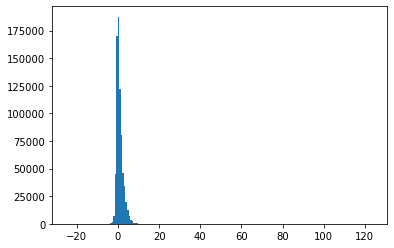

In [34]:
plt.hist(spread, bins=200)
plt.show()

Given the skewness of some of the spread distributions, the standard deviation may have little meaning. Instead the interquartile range may provide a better view of the measure of data distribution.

In [37]:
q3, q2, q1 = np.percentile(list(stats_df['spread']), [75, 50 ,25])
iqr = q3 - q1

mean = statistics.mean(list(stats_df['spread']))

std = statistics.stdev(list(stats_df['spread']))

print(f'Q3 = {q3}, Median = {q2}, Q1 = {q1}, IQR = {iqr}')
print(f'Mean = {mean}')
print(f'Std = {std}')

Q3 = 0.40000000000009095, Median = 0.0, Q1 = -0.40000000000009095
IQR = 0.8000000000001819


Potential strategy variations

1. Execute signal is given when (Total fees + Q3 + Mean spread) < spread. Trades are closed when the spread falls below the Q3 spread. Spreads are evaluated on the closing price.

### Strategy

In [41]:
# adding fees
main_df['total_fees'] = 0.0028*(main_df['Spot_open'] + main_df['PERP_open'])
main_df['Mean'] = mean
main_df['Q3'] = q3
main_df['Std'] = std
main_df['Median'] = q2

C:\Users\spenc\AppData\Local\Temp/ipykernel_14200/3020684952.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df['total_fees'] = 0.0028*(main_df['Spot_open'] + main_df['PERP_open'])
C:\Users\spenc\AppData\Local\Temp/ipykernel_14200/3020684952.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df['Mean'] = mean
C:\Users\spenc\AppData\Local\Temp/ipykernel_14200/3020684952.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

If BTCUSD > BTCPERP then long BTCPERP and short BTCUSD if possible (0) else if BTCUSD < BTCPERP then short BTCPERP (1) and long BTCUSD if possible.

0 = long BTCPERP, short BTCUSD

1 = short BTCPERP, long BTCUSD

In this case, we are only looking to short BTCPERP and long BTCUSD.

Execute encodes whether trades are executed. Instead of using absolute spreads, spreads are used to filter out unwanted trades. Execution is only possible where spreads > fees + threshold(based on some statistic).

In [42]:
execute = pd.DataFrame(np.where(main_df['spread'] > (main_df['total_fees'] + mean), 1, 0))
execute.index = main_df.index
execute.columns = ['Execute']

# creating new dataframe called comb_df
comb_df = pd.concat([main_df, execute], axis=1)
comb_df

PERP_open  Spot_open  PERP_close  Spot_close  spread  \
time                                                                 
1.648764e+12     3287.9     3287.9      3288.2      3288.2     0.0   
1.648764e+12     3288.2     3288.2      3291.5      3291.5     0.0   
1.648764e+12     3291.5     3291.5      3285.7      3285.9     0.0   
1.648764e+12     3285.7     3285.9      3284.5      3284.3    -0.2   
1.648764e+12     3284.5     3284.3      3285.3      3284.9     0.2   
...                 ...        ...         ...         ...     ...   
1.653912e+12     1900.1     1899.7      1900.1      1899.9     0.4   
1.653912e+12     1900.1     1899.9      1899.3      1898.9     0.2   
1.653912e+12     1899.3     1898.9      1899.8      1899.3     0.4   
1.653912e+12     1899.8     1899.3      1898.8      1898.4     0.5   
1.653912e+12     1898.8     1898.4      1901.7      1901.4     0.4   

              close_spread  total_fees      Mean   Q3       Std  Median  \
time                                                                      
1.648764e+12           0.0    18.41224  0.025023  0.4  0.644465     0.0   
1.648764e+12           0.0    18.41392  0.025023  0.4  0.644465     0.0   
1.648764e+12          -0.2    18.43240  0.025023  0.4  0.644465     0.0   
1.648764e+12           0.2    18.40048  0.025023  0.4  0.644465     0.0   
1.648764e+12           0.4    18.39264  0.025023  0.4  0.644465     0.0   
...                    ...         ...       ...  ...       ...     ...   
1.653912e+12           0.2    10.63944  0.025023  0.4  0.644465     0.0   
1.653912e+12           0.4    10.64000  0.025023  0.4  0.644465     0.0   
1.653912e+12           0.5    10.63496  0.025023  0.4  0.644465     0.0   
1.653912e+12           0.4    10.63748  0.025023  0.4  0.644465     0.0   
1.653912e+12           0.3    10.63216  0.025023  0.4  0.644465     0.0   

              Execute  
time                   
1.648764e+12        0  
1.648764e+12        0  
1.648764e+12        0  
1.648764e+12        0  
1.648764e+12        0  
...               ...  
1.653912e+12        0  
1.653912e+12        0  
1.653912e+12        0  
1.653912e+12        0  
1.653912e+12        0  

[85800 rows x 12 columns]

Exit encodes where the spread between the close prices is below the determined exit point.

In [43]:
exit = pd.DataFrame(np.where(comb_df['close_spread'] < mean, 1, 0))
exit.index = comb_df.index
exit.columns = ['Exit']
comb_df = pd.concat([comb_df, exit], axis=1)
comb_df

PERP_open  Spot_open  PERP_close  Spot_close  spread  \
time                                                                 
1.648764e+12     3287.9     3287.9      3288.2      3288.2     0.0   
1.648764e+12     3288.2     3288.2      3291.5      3291.5     0.0   
1.648764e+12     3291.5     3291.5      3285.7      3285.9     0.0   
1.648764e+12     3285.7     3285.9      3284.5      3284.3    -0.2   
1.648764e+12     3284.5     3284.3      3285.3      3284.9     0.2   
...                 ...        ...         ...         ...     ...   
1.653912e+12     1900.1     1899.7      1900.1      1899.9     0.4   
1.653912e+12     1900.1     1899.9      1899.3      1898.9     0.2   
1.653912e+12     1899.3     1898.9      1899.8      1899.3     0.4   
1.653912e+12     1899.8     1899.3      1898.8      1898.4     0.5   
1.653912e+12     1898.8     1898.4      1901.7      1901.4     0.4   

              close_spread  total_fees      Mean   Q3       Std  Median  \
time                                                                      
1.648764e+12           0.0    18.41224  0.025023  0.4  0.644465     0.0   
1.648764e+12           0.0    18.41392  0.025023  0.4  0.644465     0.0   
1.648764e+12          -0.2    18.43240  0.025023  0.4  0.644465     0.0   
1.648764e+12           0.2    18.40048  0.025023  0.4  0.644465     0.0   
1.648764e+12           0.4    18.39264  0.025023  0.4  0.644465     0.0   
...                    ...         ...       ...  ...       ...     ...   
1.653912e+12           0.2    10.63944  0.025023  0.4  0.644465     0.0   
1.653912e+12           0.4    10.64000  0.025023  0.4  0.644465     0.0   
1.653912e+12           0.5    10.63496  0.025023  0.4  0.644465     0.0   
1.653912e+12           0.4    10.63748  0.025023  0.4  0.644465     0.0   
1.653912e+12           0.3    10.63216  0.025023  0.4  0.644465     0.0   

              Execute  Exit  
time                         
1.648764e+12        0     1  
1.648764e+12        0     1  
1.648764e+12        0     1  
1.648764e+12        0     0  
1.648764e+12        0     0  
...               ...   ...  
1.653912e+12        0     0  
1.653912e+12        0     0  
1.653912e+12        0     0  
1.653912e+12        0     0  
1.653912e+12        0     0  

[85800 rows x 13 columns]

In [44]:
# counting the number of trade executes
np.unique(comb_df['Execute'], return_counts=True)

(array([0]), array([85800], dtype=int64))

In [45]:
# viewing the order executions
orders_fulfilled = comb_df.loc[comb_df['Execute']==1]
orders_fulfilled

Empty DataFrame
Columns: [PERP_open, Spot_open, PERP_close, Spot_close, spread, close_spread, total_fees, Mean, Q3, Std, Median, Execute, Exit]
Index: []

### Simulating the strategy

The strategy relies on being able to enter at or near the open price and exit at or near the close price of the security. Trades are therefore open at the beginning of candles and only closed at the end of candles when the exit criteria is met.

The tunable parameters within the strategy are the entry and exit rules relying on statistics. These can be tuned to provide the best trade-off between return and time in the market. We want to maximise return but minimize the length of time for which a trade is open. Owing to the low returns provided by arbitrage, large percentages of the account must be committed to trades. Whilst an arbitrage trade is open, we cannot take advantage of other potentially more lucrative arbitrage opportunities.

In simulating the strategy, we know that we are going to short perpetual futures and long spot.

In [17]:
Trade_counter = 0
Trade_open = 0

In [18]:
# lists of df cols
Spot_open = comb_df['Spot_open'].values
PERP_open = comb_df['PERP_open'].values
Spot_close = comb_df['Spot_close'].values
PERP_close = comb_df['PERP_close'].values
spread = comb_df['spread'].values
close_spread = comb_df['close_spread'].values
total_fees = comb_df['total_fees'].values
execute = comb_df['Execute'].values
exit = comb_df['Exit'].values
timestamps = comb_df.index.values

In [19]:
trades = ({
    'Spot_price_diff':[],
    'Perp_price_diff' :[],
    'Duration':[],
    'Total_fees':[],
    'Total_return': [],
    'Total_return_%': []
               })
trade_df = pd.DataFrame(trades)
trade_df

Empty DataFrame
Columns: [Spot_price_diff, Perp_price_diff, Duration, Total_fees, Total_return, Total_return_%]
Index: []

In [20]:
for num in range(1, len(comb_df)):
    if execute[num] == 1 and Trade_open == 0:
        Spot_trade_open = Spot_open[num]
        Perp_trade_open = PERP_open[num]
        Trade_open_fees = 0.0007*Spot_open[num]+0.0007*PERP_open[num]
        Trade_open_time = timestamps[num]
        
        Trade_counter += 1
        Trade_open += 1
        
    if Trade_open == 1 and exit[num] == 1:
        Spot_trade_close = Spot_close[num]
        Perp_trade_close = PERP_close[num]
        Trade_close_fees = 0.0007*(Spot_close[num])+0.0007*(PERP_close[num])
        Trade_close_time = timestamps[num]
        
        Trade_open -= 1
        
        Spot_price_diff = Spot_trade_close - Spot_trade_open
        Perp_price_diff = Perp_trade_open - Perp_trade_close
        Duration = Trade_close_time - Trade_open_time
        Total_fees = Trade_open_fees + Trade_close_fees
        Total_return = (Spot_price_diff + Perp_price_diff)-Total_fees
        Total_return_percent = Total_return/(Spot_trade_open+Perp_trade_open)*100
        
        new_row = {'Spot_price_diff':Spot_price_diff, 'Perp_price_diff':Perp_price_diff, 
                   'Duration':Duration, 'Total_fees':Total_fees, 'Total_return':Total_return,
                   'Total_return_%':Total_return_percent}
        trade_df = trade_df.append(new_row, ignore_index=True)

In [21]:
trade_df

Spot_price_diff  Perp_price_diff  Duration  Total_fees  Total_return  \
0             1.09            -0.62  180000.0     0.16555       0.30445   

   Total_return_%  
0        0.259338

In [22]:
total_return = trade_df['Total_return_%'].sum()
average_duration = (trade_df['Duration'].mean())/(1000*60)

print(f'Total percentage return: {total_return} \n Average duration: {average_duration} minutes')

Total percentage return: 0.25933813194769695 
 Average duration: 3.0 minutes
